#3

In [ ]:
# 3. решите задачу набора данных лекции 7.

# Задание (файл 2)
# Разделить данные на N групп. (возможно, выбрать первые M данных для обучения)
# Реализовать предсказание ARIMA для 2 (тренировочной группы) на основе 1. Рассчитать MSE.
# Исследовать качество работы модели в зависимости от параметров (для групп 1-2).
# (1)Выполнить итеративное предсказание, данные для каждого следующего предсказания обновлять по методу
# "экспоненциальное среднее".

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/AIM_WORK/Lab10/ETTm1.csv')

In [21]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Разделим данные на N групп
N = 700
groups = np.array_split(data.OT, N)

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


In [22]:
train_data = groups[0]
test_data = groups[1]

In [23]:
train_data.size

100

## ARIMA

In [24]:
predictions = []

# Обучение модели ARIMA на 1-й группе
model = ARIMA(train_data, order=(3, 0, 0))  # Параметры (p, d, q) можно настроить
model_fit = model.fit()

In [25]:
# Прогноз для 2-й группы
predicted_values = model_fit.forecast(steps=len(test_data))
predictions.extend(predicted_values)

MSE: 7.851663135700859


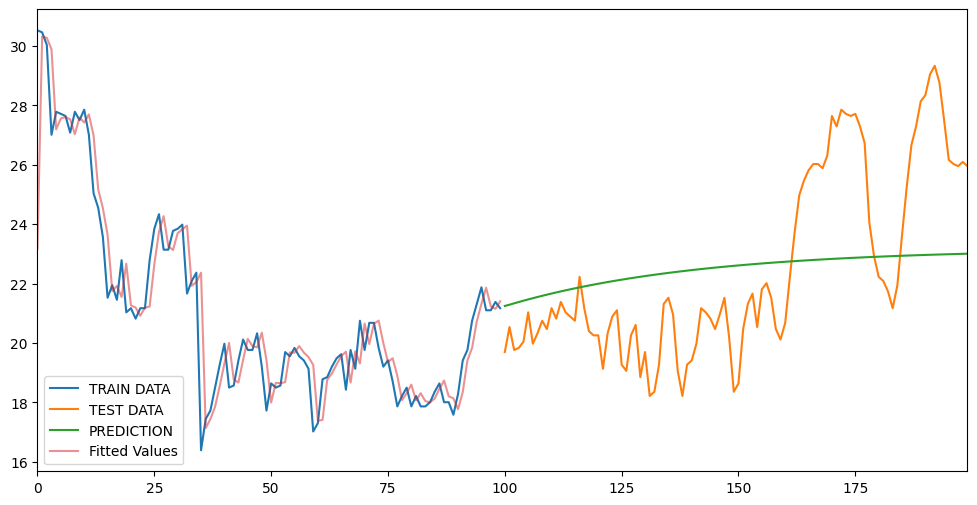

In [26]:
import matplotlib.pyplot as plt

# Рассчитаем MSE (среднеквадратичную ошибку)
mse = mean_squared_error(test_data, predicted_values)
print(f"MSE: {mse}")

train_data.plot(legend=True, label='TRAIN DATA')
test_data.plot(legend=True, label='TEST DATA', figsize=(12, 6)).autoscale(axis='x', tight=True)
predicted_values.plot(legend=True, label='PREDICTION')
plt.plot(model_fit.fittedvalues, label='Fitted Values', alpha=0.5)
plt.legend()
plt.show()

## Экспоненциальное сглаживание

MSE: 29.73341610849227


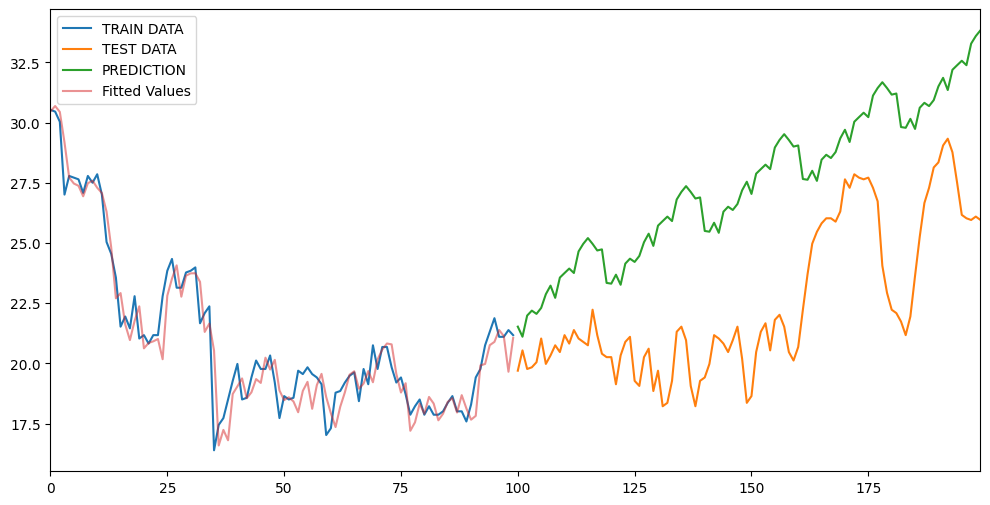

In [27]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

exp_model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=21).fit()

test_predictions = exp_model.forecast(len(test_data))

mse = mean_squared_error(test_data, test_predictions)
print(f"MSE: {mse}")

train_data.plot(legend=True, label='TRAIN DATA')
test_data.plot(legend=True, label='TEST DATA', figsize=(12, 6)).autoscale(axis='x', tight=True)
test_predictions.plot(legend=True, label='PREDICTION')
plt.plot(exp_model.fittedvalues, label='Fitted Values', alpha=0.5)
plt.legend()
plt.show()

##Бэггинг ARIMA и Эксп. сглаживания

In [28]:
predictions = (test_predictions + predicted_values) / 2

MSE: 10.783191183132379


<Axes: >

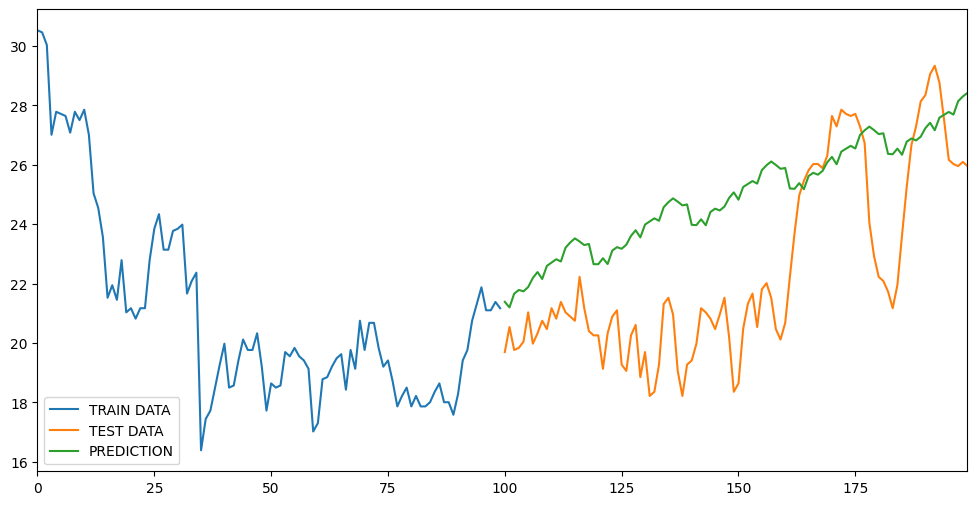

In [29]:
mse = mean_squared_error(test_data, predictions)
print(f"MSE: {mse}")

train_data.plot(legend=True, label='TRAIN DATA')
test_data.plot(legend=True, label='TEST DATA', figsize=(12, 6)).autoscale(axis='x', tight=True)
predictions.plot(legend=True, label='PREDICTION')

##Предсказание на интервалах по 100 значений

MSE: 10.783191183132379


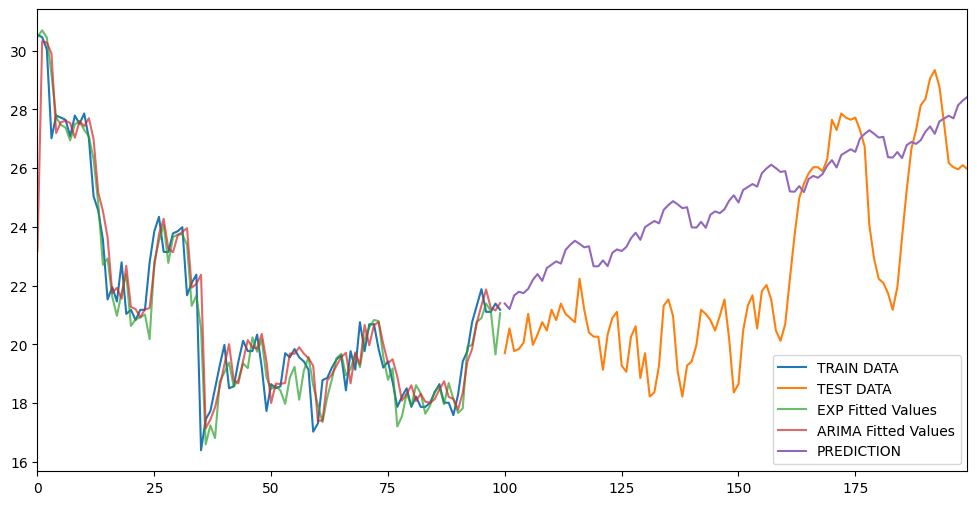

MSE: 3.5178561326316378


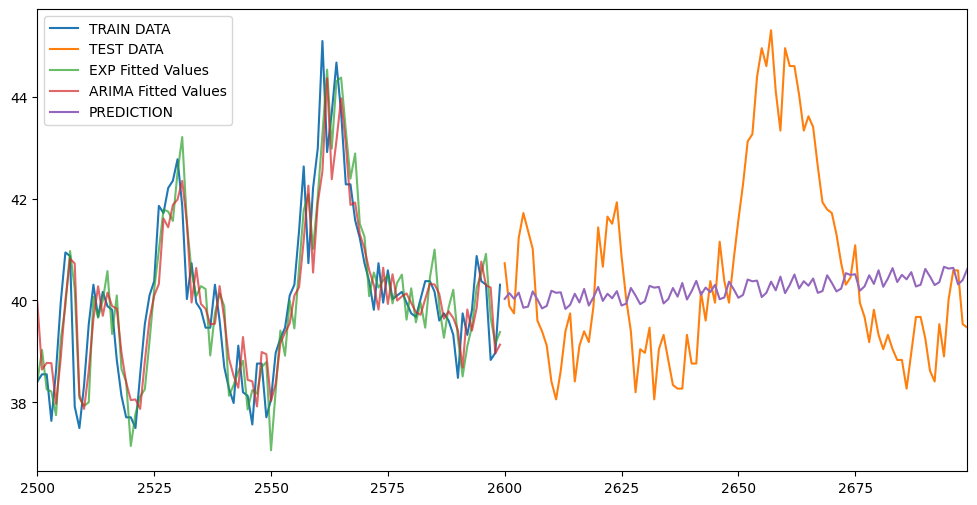

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


MSE: 13.140016608450068


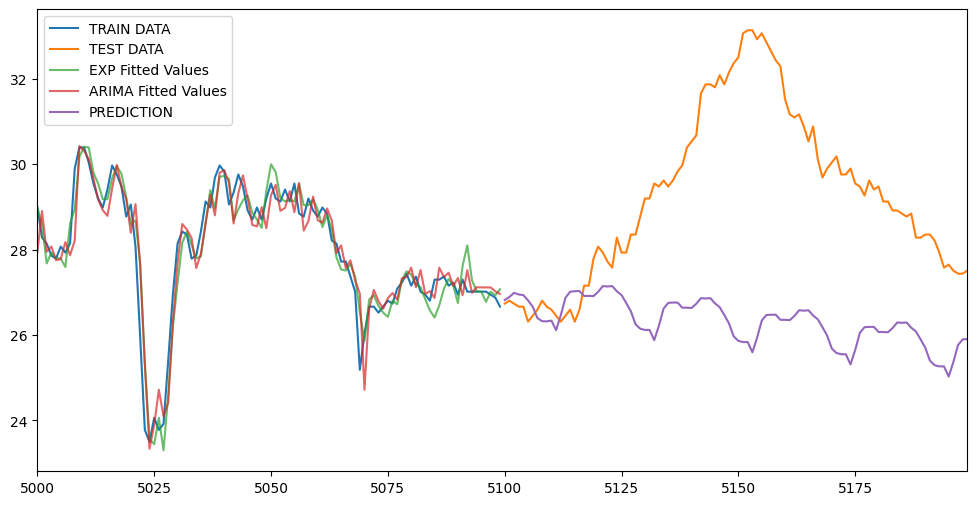

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


MSE: 11.46024397670991


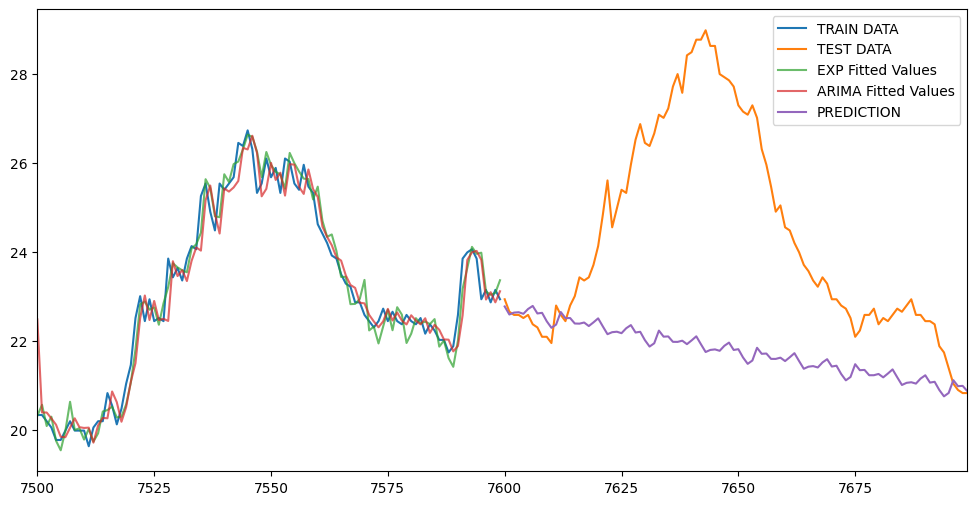

MSE: 1.4320244560968165


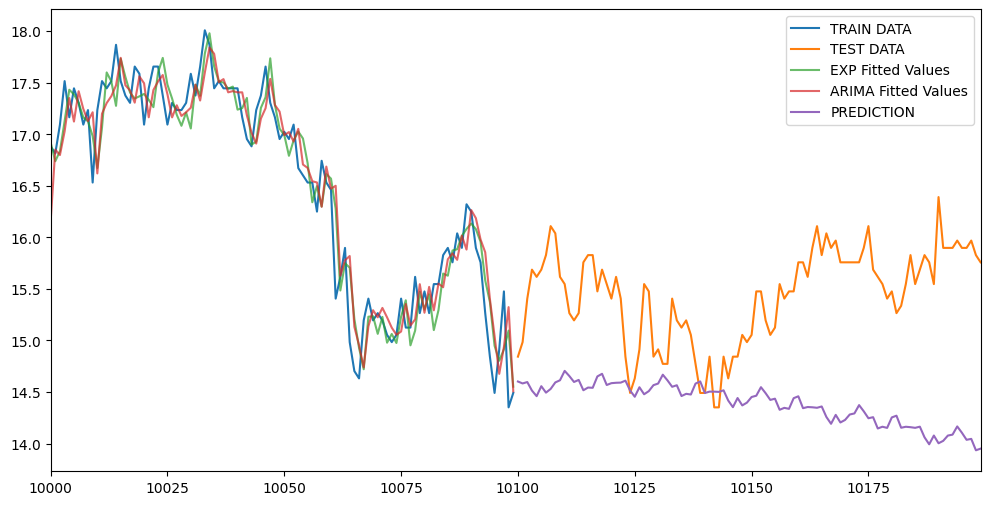

MSE: 18.63415095181314


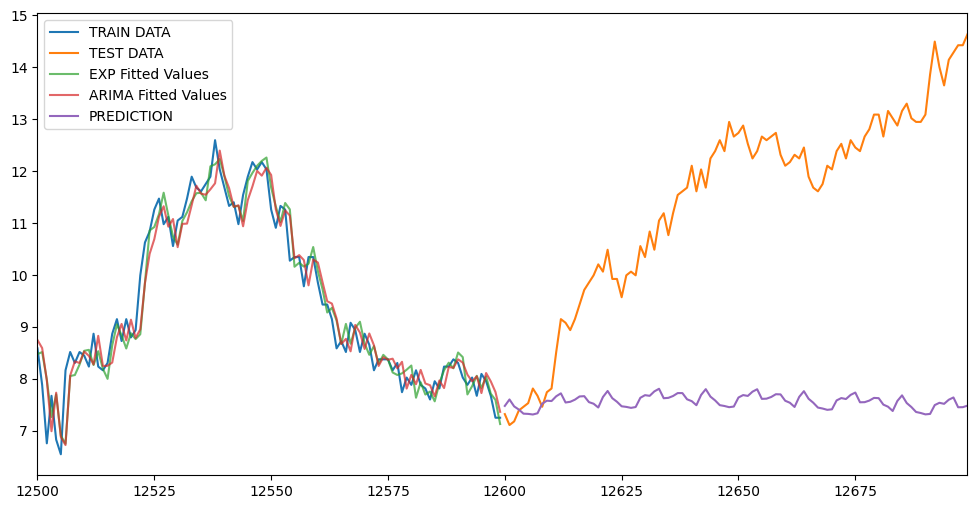

MSE: 190.8819657233829


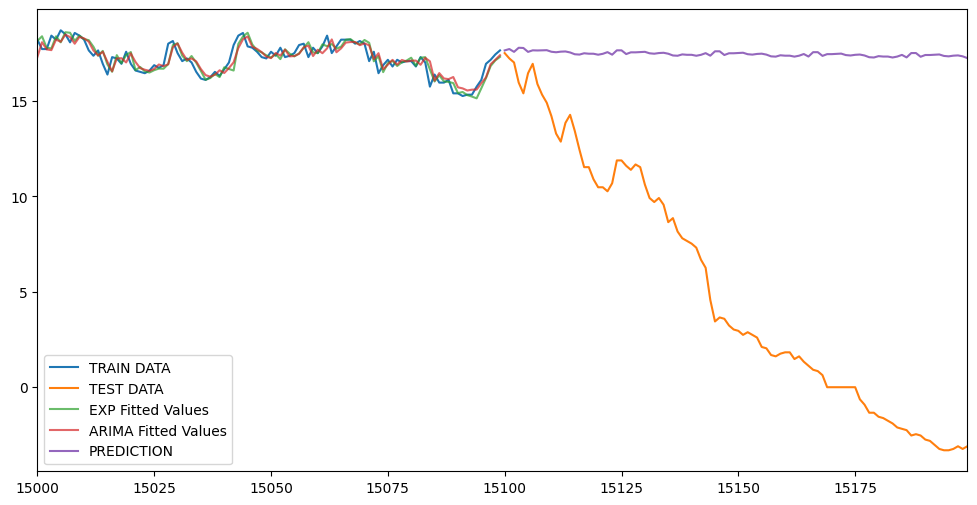

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


MSE: 0.43035405053771586


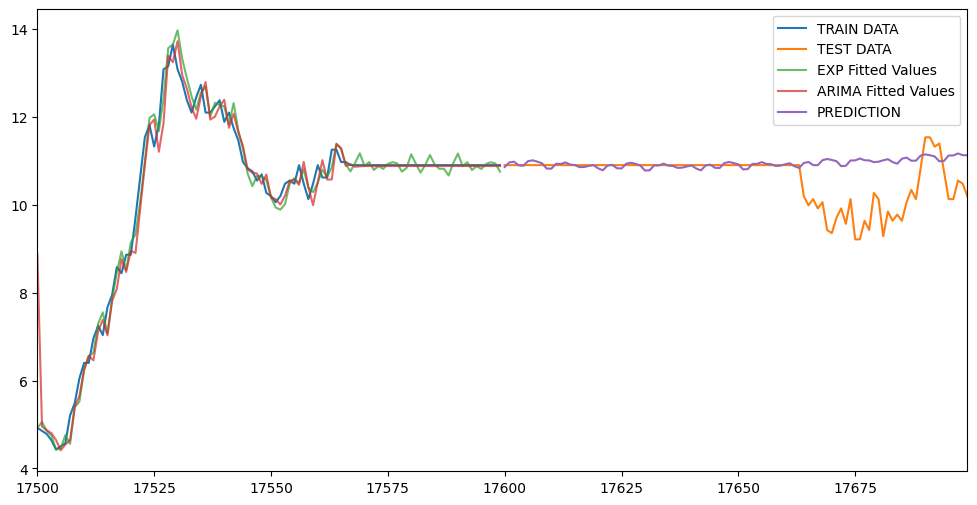

MSE: 8.345824388704692


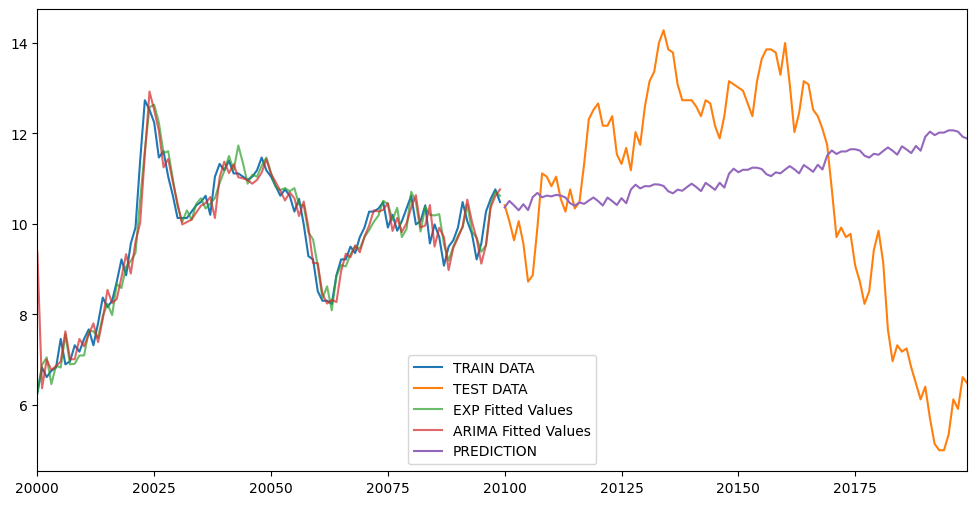

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MSE: 6.031732485844682


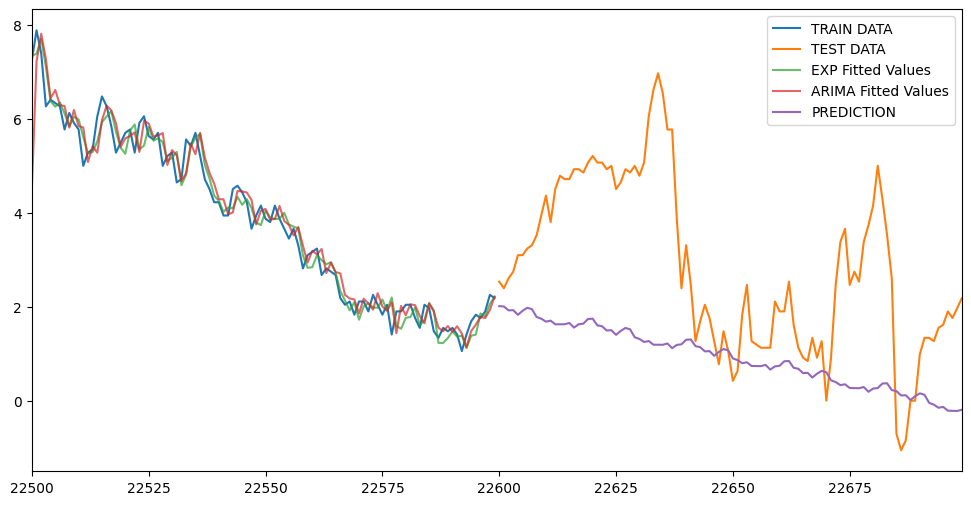

MSE: 8.212033787128249


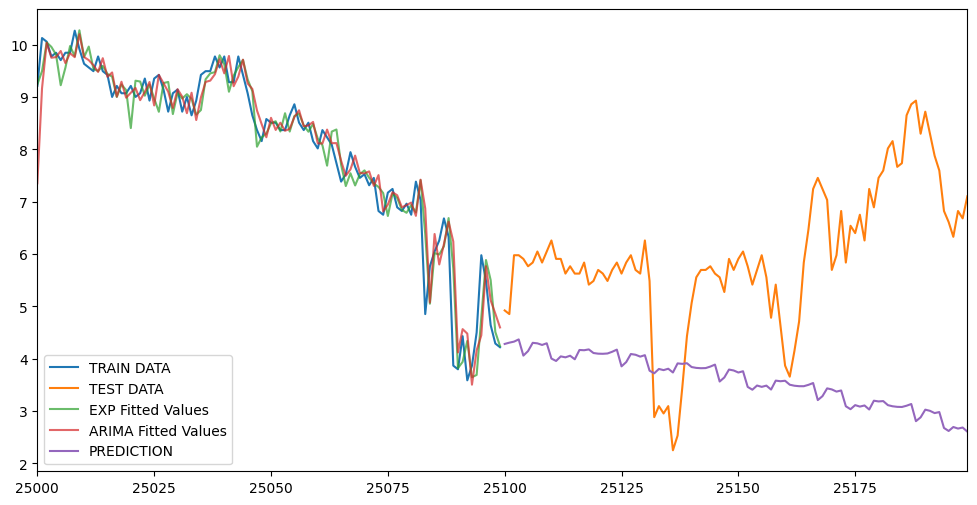

MSE: 5.860338261959483


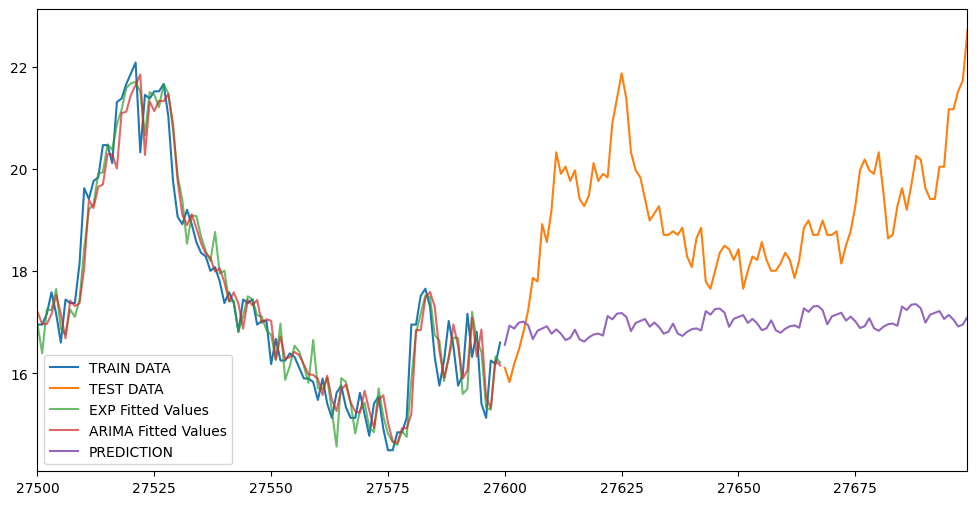

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


MSE: 2.1278414014797296


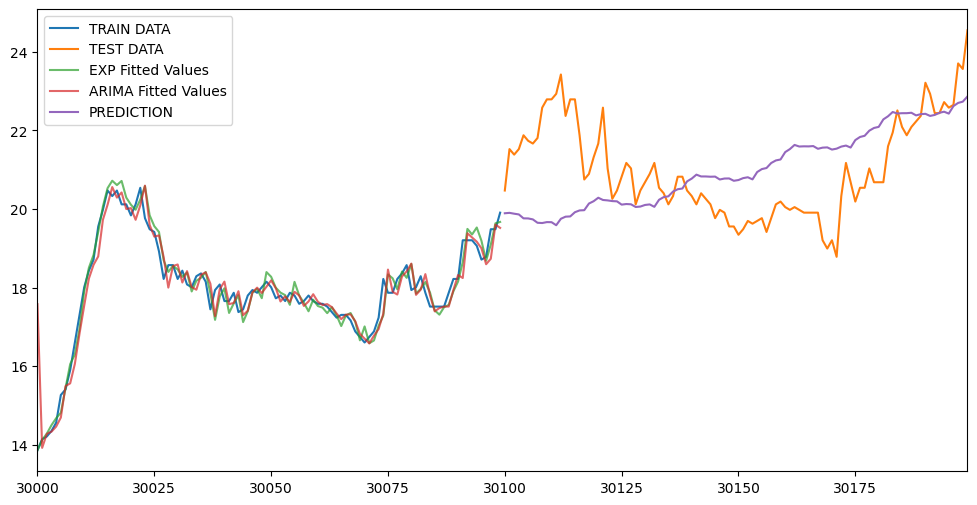

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


MSE: 68.04836083700602


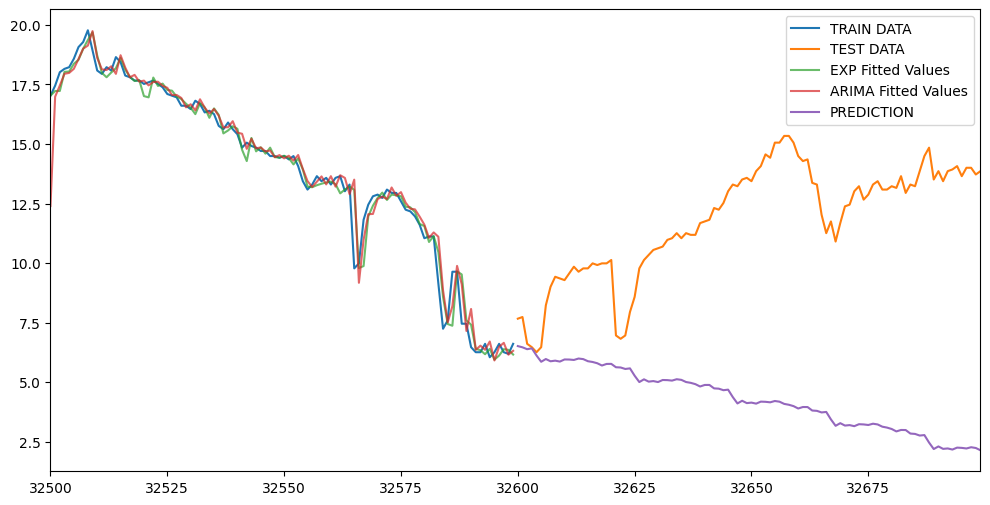

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


MSE: 21.018254239254684


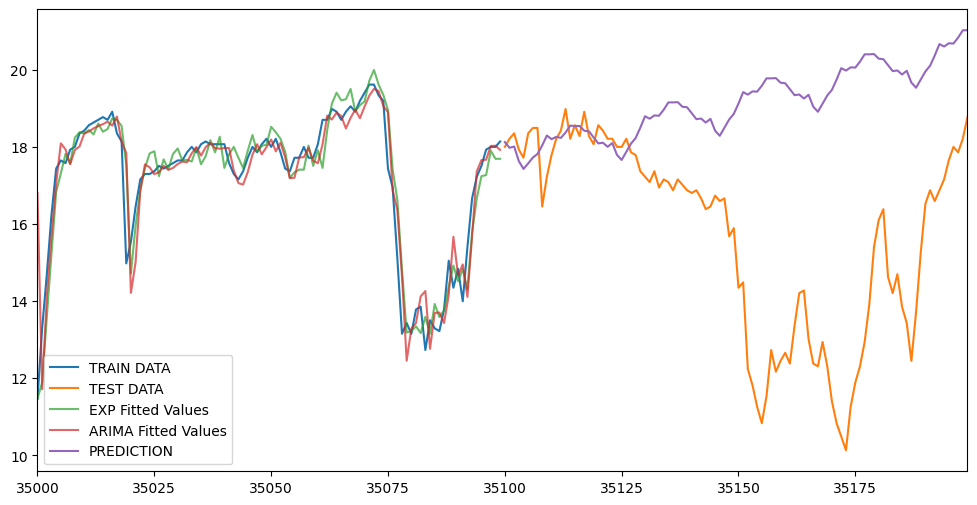

MSE: 44.354931865840555


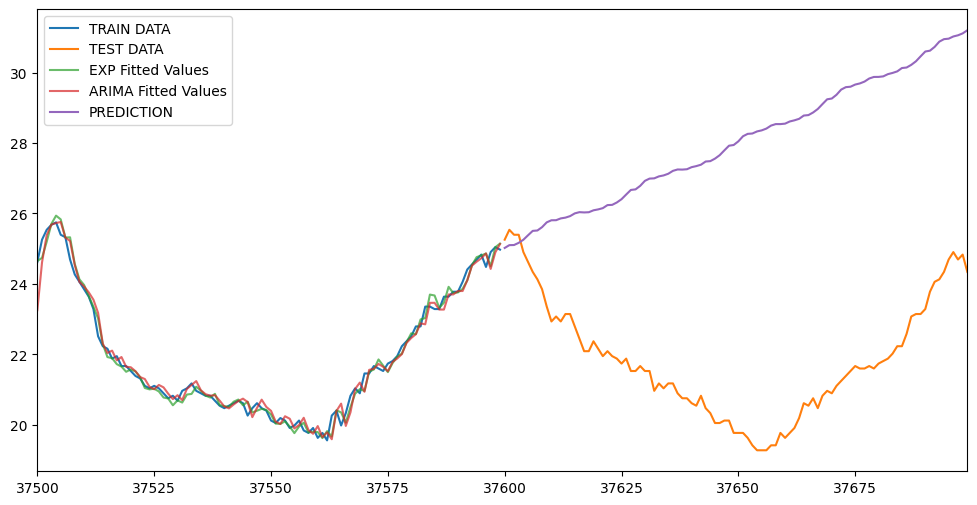

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


MSE: 9.594477317162477


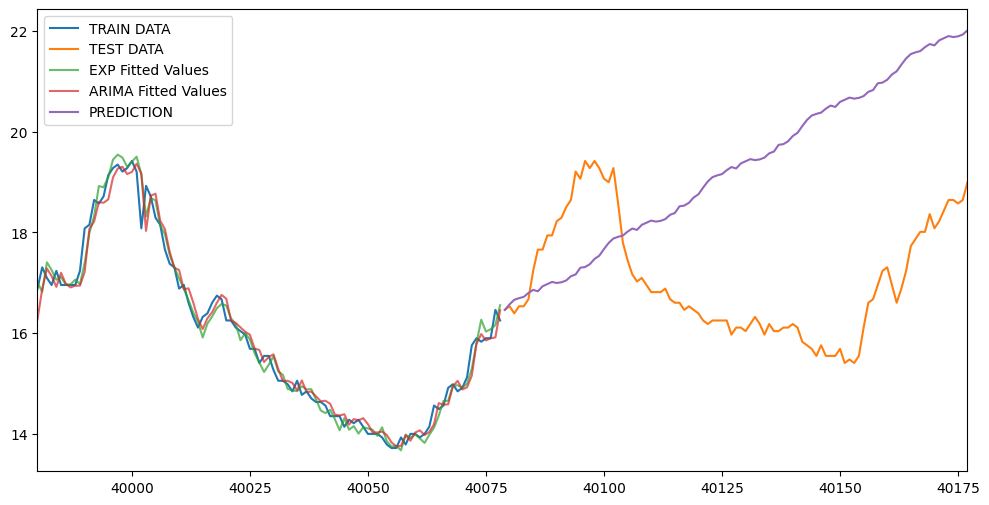

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


MSE: 18.54515635280128


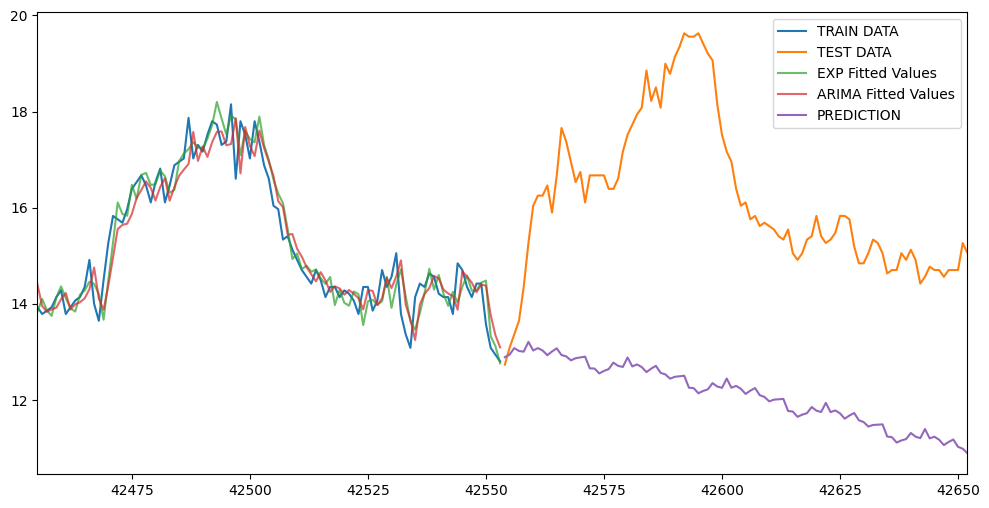

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


MSE: 1.6320210841128084


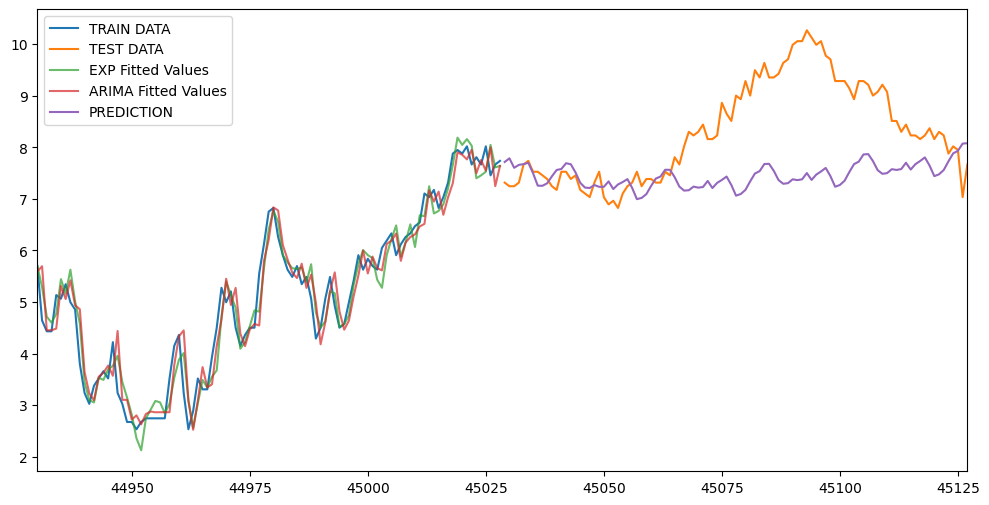

MSE: 0.8983740918128347


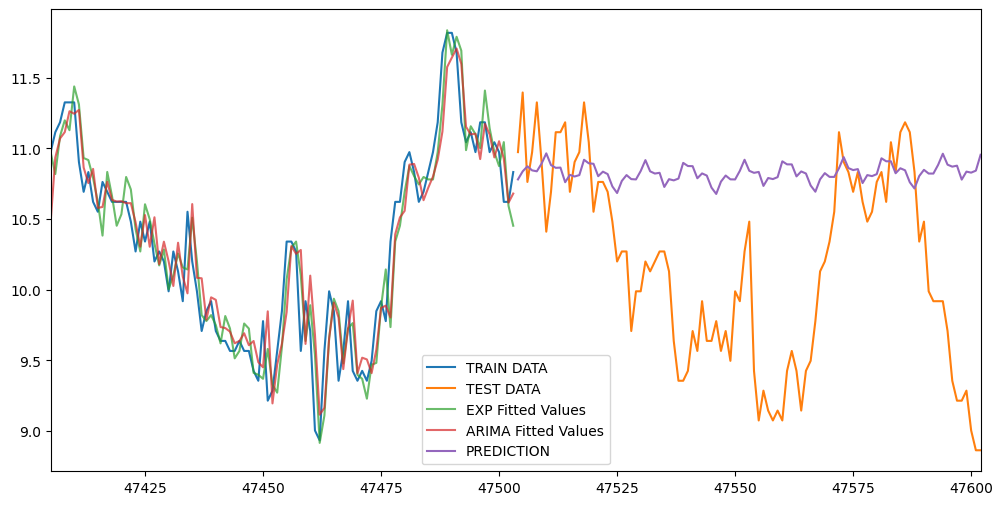

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


MSE: 11.044828215678862


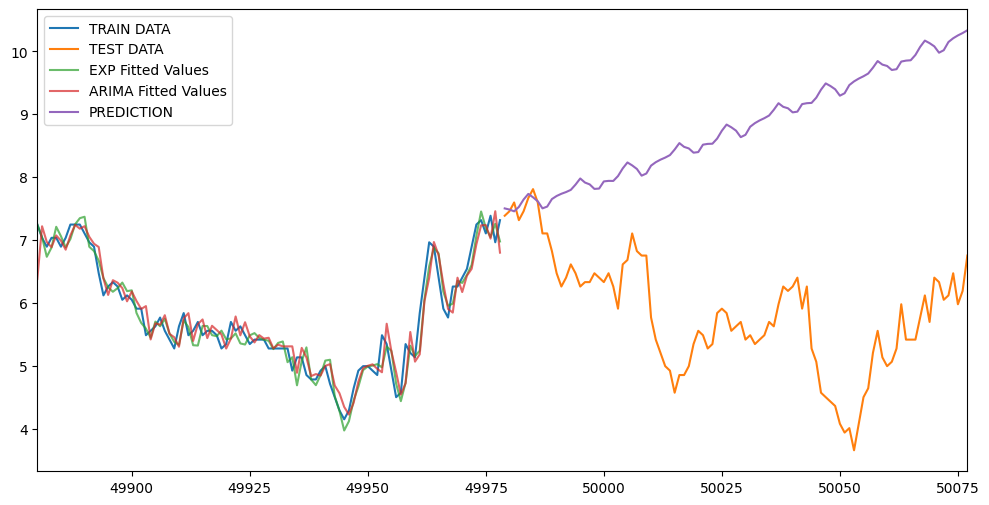

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MSE: 5.183687113425771


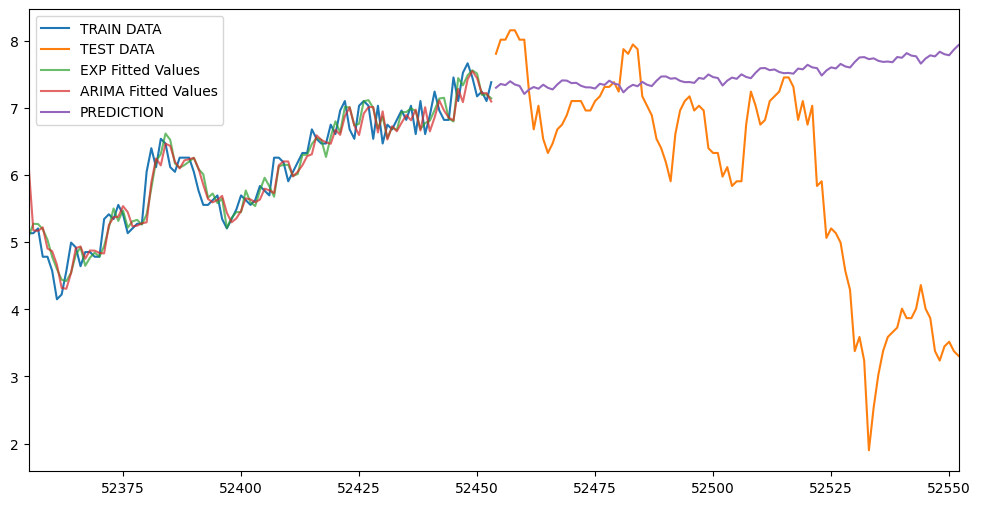

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


MSE: 3.6793364902646926


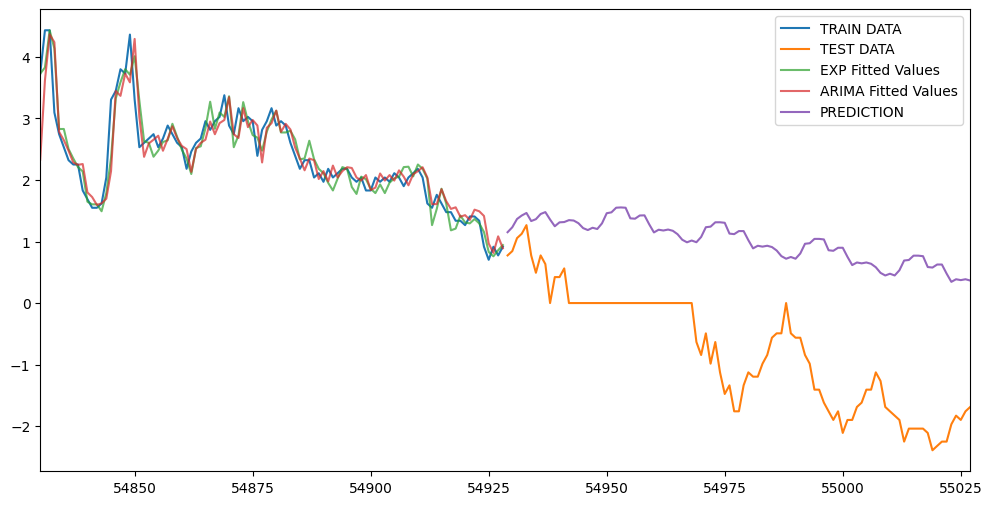

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


MSE: 2.148203983659957


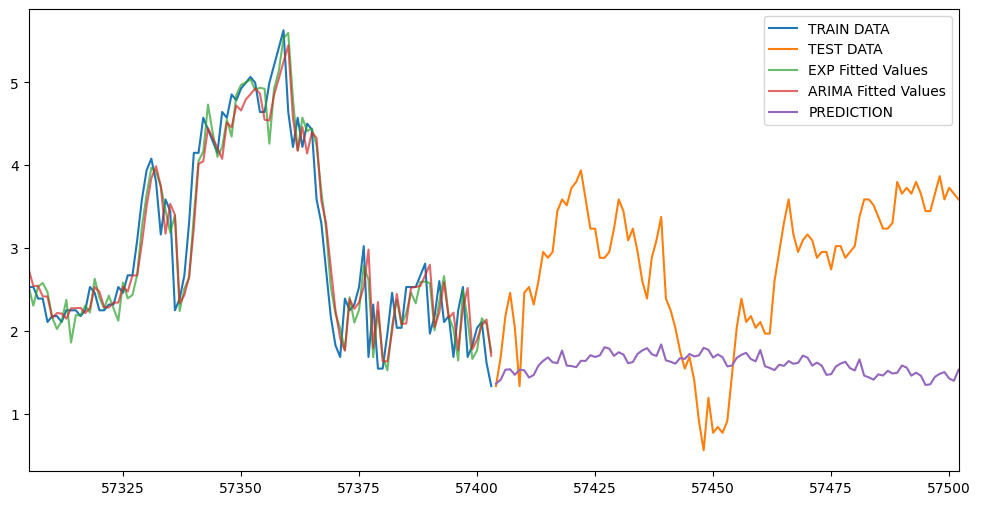

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


MSE: 7.539110346124591


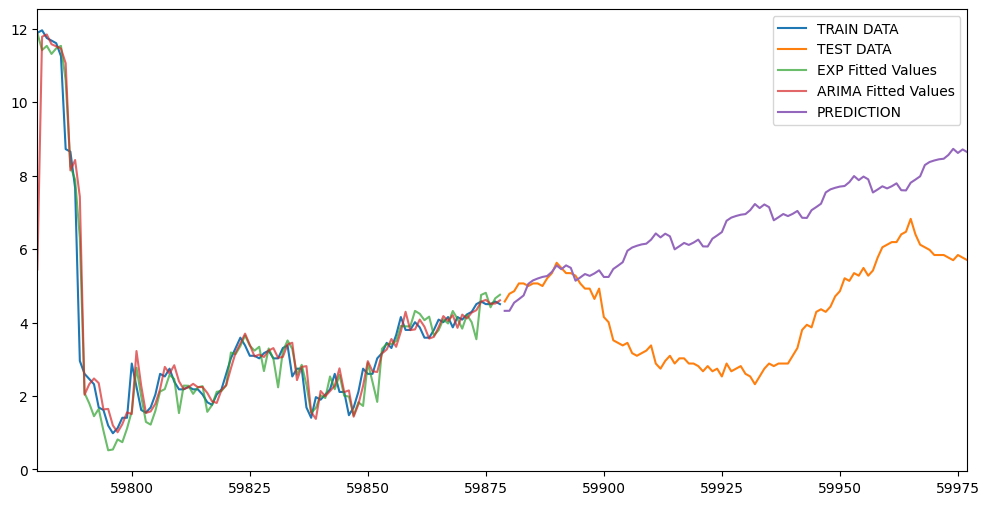

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


MSE: 13.01095747975274


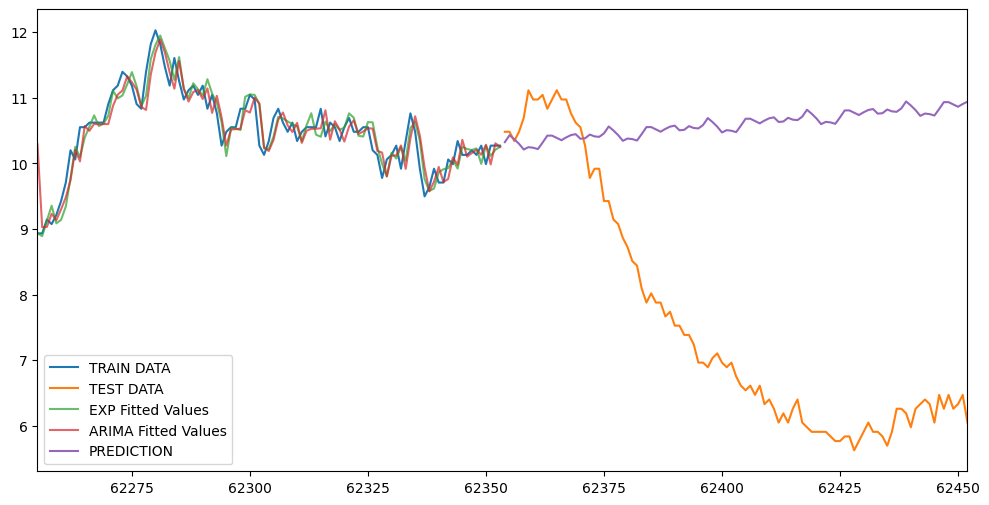

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MSE: 1.196055324770527


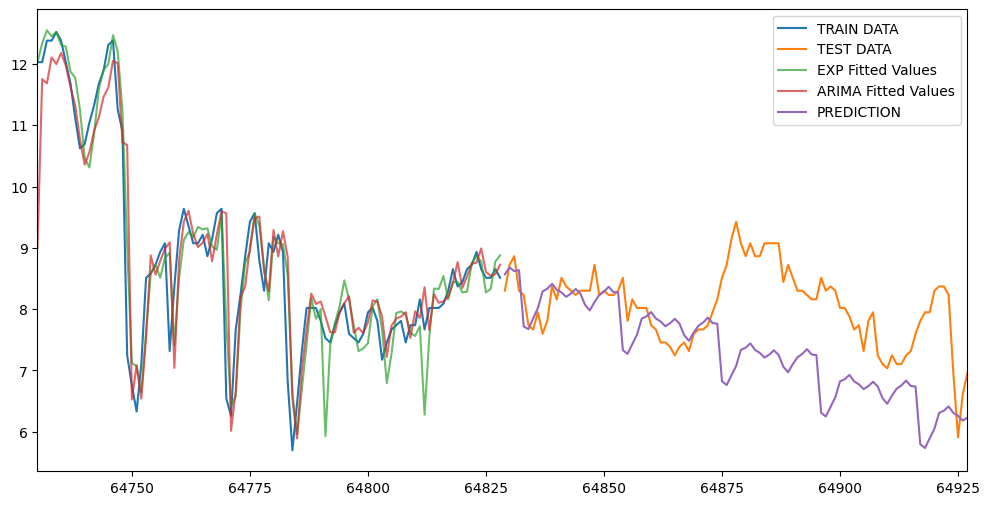

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


MSE: 1.7069403159562335


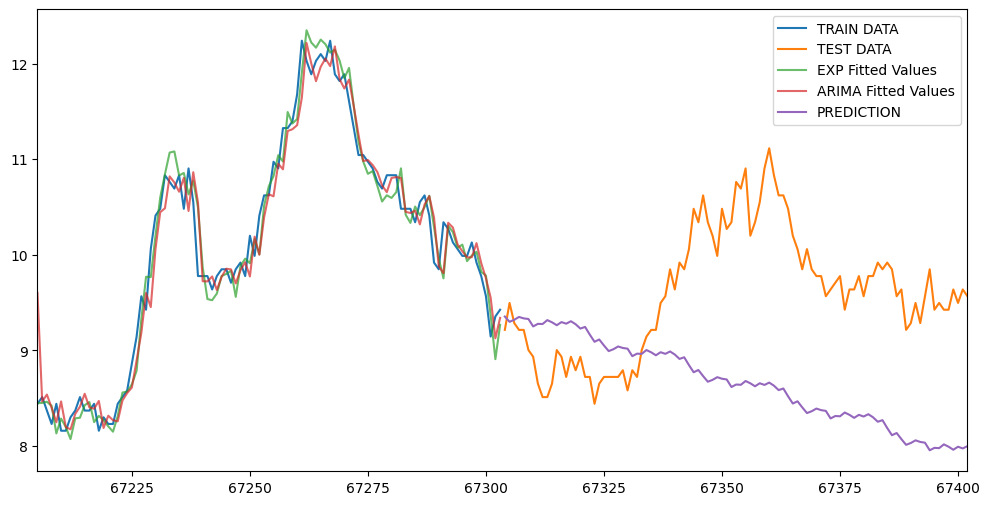

In [30]:
mse_values = []

for i in range(len(groups) - 1):
    train = groups[i]
    test = groups[i+1]

    arima_model = ARIMA(train, order=(3, 0, 0)).fit()
    arima_predicted = arima_model.forecast(steps=len(test))

    exp_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=21).fit()
    test_predictions = exp_model.forecast(len(test))

    predictions = (test_predictions + arima_predicted) / 2

    mse = mean_squared_error(test, predictions)
    mse_values.append(mse)

    if i % 25 == 0:
        print(f"MSE: {mse}")

        train.plot(legend=True, label='TRAIN DATA')
        test.plot(legend=True, label='TEST DATA', figsize=(12, 6)).autoscale(axis='x', tight=True)
        plt.plot(exp_model.fittedvalues, label='EXP Fitted Values', alpha=0.7)
        plt.plot(arima_model.fittedvalues, label='ARIMA Fitted Values', alpha=0.7)
        plt.legend()
        predictions.plot(legend=True, label='PREDICTION')
        plt.show()